# STATS-BOMB : OPENDATA - DATASET
## [Matches, Lineups, Events, 360 view data]


### 1.) Importing Libraries

In [13]:
# Importing Libraries
import os
import json
import requests
import time
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
from datetime import datetime

### 2.) Data loading from seperated JSON files

### 2.1) Matches

In [21]:

dirname = os.getcwd()
rel_matches_path = 'OneDrive - Association Cesi Viacesi mail\Bureau\Projects\winAi\Datasets\\raw-externe\kaggle\stats-bomb\data\matches'
root_path = os.path.join(dirname, rel_matches_path)

def find_json_files(directory):
    json_files = [] 
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                json_files.append(os.path.join(root, file))
    return json_files

json_files = find_json_files(root_path)
dataframes = [pd.read_json(file) for file in json_files]
matches_df = pd.concat(dataframes, ignore_index=True)

matches_df.reset_index(drop=True, inplace=True)
print(matches_df)


      match_id  match_date      kick_off  \
0         9880  2018-04-14  16:15:00.000   
1         9912  2018-04-29  20:45:00.000   
2         9924  2018-05-06  20:45:00.000   
3         9855  2018-03-18  16:15:00.000   
4         9827  2018-03-01  21:00:00.000   
...        ...         ...           ...   
3428   3895113  2023-10-21  16:30:00.000   
3429   3895095  2023-09-30  16:30:00.000   
3430   3895067  2023-09-02  16:30:00.000   
3431   3895060  2023-08-26  19:30:00.000   
3432   3895052  2023-08-19  16:30:00.000   

                                            competition  \
0     {'competition_id': 11, 'country_name': 'Spain'...   
1     {'competition_id': 11, 'country_name': 'Spain'...   
2     {'competition_id': 11, 'country_name': 'Spain'...   
3     {'competition_id': 11, 'country_name': 'Spain'...   
4     {'competition_id': 11, 'country_name': 'Spain'...   
...                                                 ...   
3428  {'competition_id': 9, 'country_name': 'Germany...   

### 2.2) Events

### Batching loads of events

In [15]:
dirname = os.getcwd()
rel_events_path = 'OneDrive - Association Cesi Viacesi mail/Bureau/Projects/winAi/Datasets/raw-externe/kaggle/stats-bomb/data/events'
events_path = os.path.join(dirname, rel_events_path)

def findflat_json_files(directory, limit=None):
    json_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.json')]
    if limit:
        json_files = json_files[:limit]
    return json_files

json_files = findflat_json_files(events_path, limit=1000)

start_time = time.time()
batch_size = 5  
events_df_list = []

for i in range(0, len(json_files), batch_size):
    batch_files = json_files[i:i+batch_size]
    batch_dfs = []
    for file in batch_files:
        temp_df = pd.read_json(file)
        temp_df['match_id'] = os.path.basename(file).split('.')[0]  # Extraire le nom de fichier comme match_id
        batch_dfs.append(temp_df)
    batch_df = pd.concat(batch_dfs, ignore_index=True)
    events_df_list.append(batch_df)
    print(f'Batch {i//batch_size + 1} loaded.')

events_df = pd.concat(events_df_list, ignore_index=True)
events_df.reset_index(drop=True, inplace=True)

print(f'Total loading time: {time.time() - start_time:.2f} seconds')
print(events_df.head())

Batch 1 loaded.
Batch 2 loaded.
Batch 3 loaded.
Batch 4 loaded.
Batch 5 loaded.
Batch 6 loaded.
Batch 7 loaded.
Batch 8 loaded.
Batch 9 loaded.
Batch 10 loaded.
Batch 11 loaded.
Batch 12 loaded.
Batch 13 loaded.
Batch 14 loaded.
Batch 15 loaded.
Batch 16 loaded.
Batch 17 loaded.
Batch 18 loaded.
Batch 19 loaded.
Batch 20 loaded.
Batch 21 loaded.
Batch 22 loaded.
Batch 23 loaded.
Batch 24 loaded.
Batch 25 loaded.
Batch 26 loaded.
Batch 27 loaded.
Batch 28 loaded.
Batch 29 loaded.
Batch 30 loaded.
Batch 31 loaded.
Batch 32 loaded.
Batch 33 loaded.
Batch 34 loaded.
Batch 35 loaded.
Batch 36 loaded.
Batch 37 loaded.
Batch 38 loaded.
Batch 39 loaded.
Batch 40 loaded.
Batch 41 loaded.
Batch 42 loaded.
Batch 43 loaded.
Batch 44 loaded.
Batch 45 loaded.
Batch 46 loaded.
Batch 47 loaded.
Batch 48 loaded.
Batch 49 loaded.
Batch 50 loaded.
Batch 51 loaded.
Batch 52 loaded.
Batch 53 loaded.
Batch 54 loaded.
Batch 55 loaded.
Batch 56 loaded.
Batch 57 loaded.
Batch 58 loaded.
Batch 59 loaded.
Batch 

### 3.) Match analytics
#### *Some basic stats about the dataset*

#### 3.1.) Scores distibution (Home-Away)

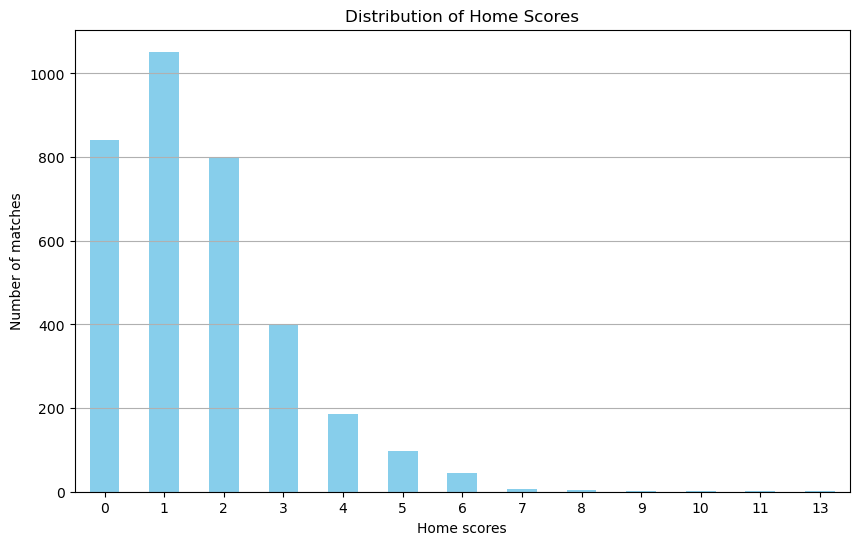

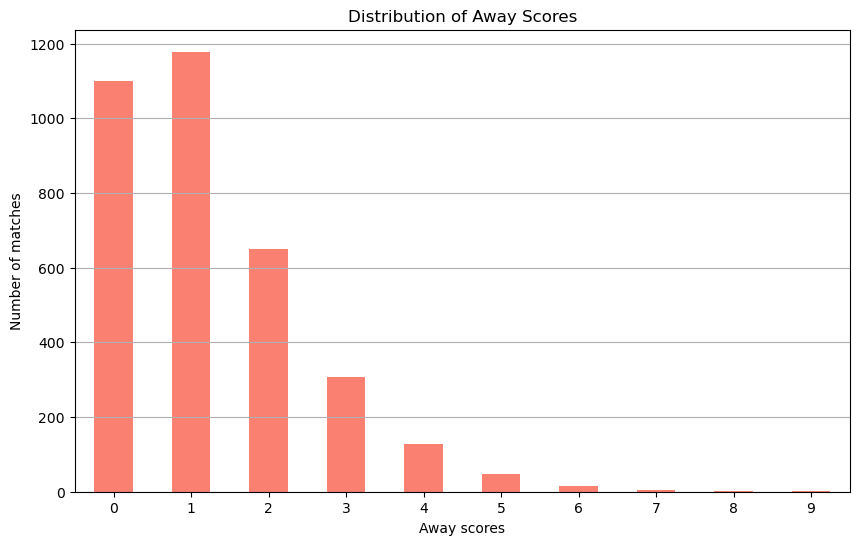

In [16]:

home_score_distribution = matches_df['home_score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
home_score_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Home scores')
plt.ylabel('Number of matches')
plt.title('Distribution of Home Scores')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

away_score_distribution = matches_df['away_score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
away_score_distribution.plot(kind='bar', color='salmon')
plt.xlabel('Away scores')
plt.ylabel('Number of matches')
plt.title('Distribution of Away Scores')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### 3.2) Average shots by match

**Filtre on shots**

In [17]:
shots_df = events_df[events_df['type'].apply(lambda x: x['name'] == 'Shot')]

print(f"Nombre total de tirs trouvés: {len(shots_df)}")

shots_per_match = shots_df.groupby('match_id').size()
shots_per_match = shots_per_match.rename_axis('match_id').reset_index(name='shots')

print(shots_per_match)

Nombre total de tirs trouvés: 25674
    match_id  shots
0      15946     28
1      15956     18
2      15973     37
3      15978     20
4      15986     28
..       ...    ...
995  3775631     26
996  3775632     28
997  3775633     20
998  3775634     17
999  3775635     24

[1000 rows x 2 columns]


**Fuse data of match and events : shots**

Nombre moyen de tirs par match: 25.674


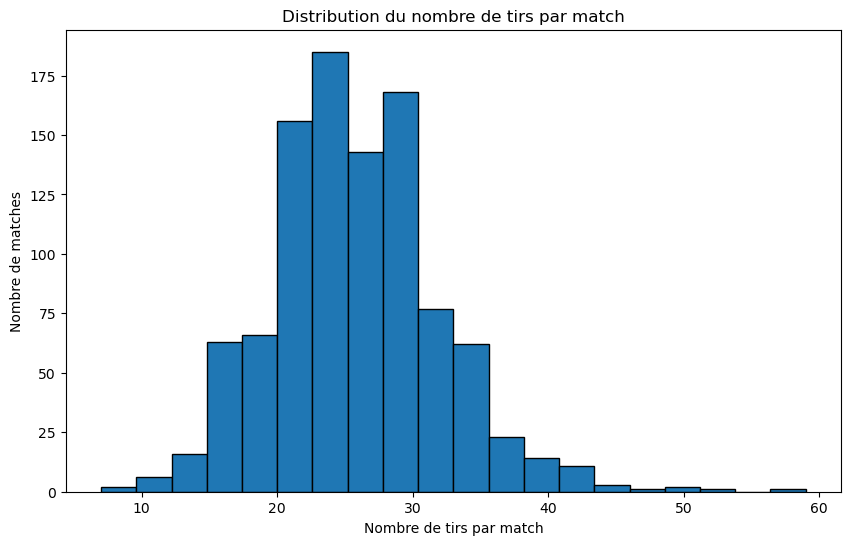

In [22]:
matches_df.columns = matches_df.columns.str.strip() 
matches_df = matches_df.loc[:, ~matches_df.columns.duplicated()] 

matches_df = matches_df.rename(columns={'match_id': 'match_id_clean'})
matches_df['match_id_clean'] = matches_df['match_id_clean'].astype(str)
shots_per_match['match_id'] = shots_per_match['match_id'].astype(str)

matches_df = matches_df.drop_duplicates(subset=['match_id_clean'])

matches_df = matches_df.merge(shots_per_match, left_on='match_id_clean', right_on='match_id', how='left')

average_shots = matches_df['shots'].mean()
print(f"Nombre moyen de tirs par match: {average_shots}")

plt.figure(figsize=(10, 6))
matches_df['shots'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Nombre de tirs par match')
plt.ylabel('Nombre de matches')
plt.title('Distribution du nombre de tirs par match')
plt.show()
